# Homework 7

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [18]:
img1 = cv2.imread('book.png',0)          # queryImage
img2 = cv2.imread('book1.jpg',0) # trainImage

In [19]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

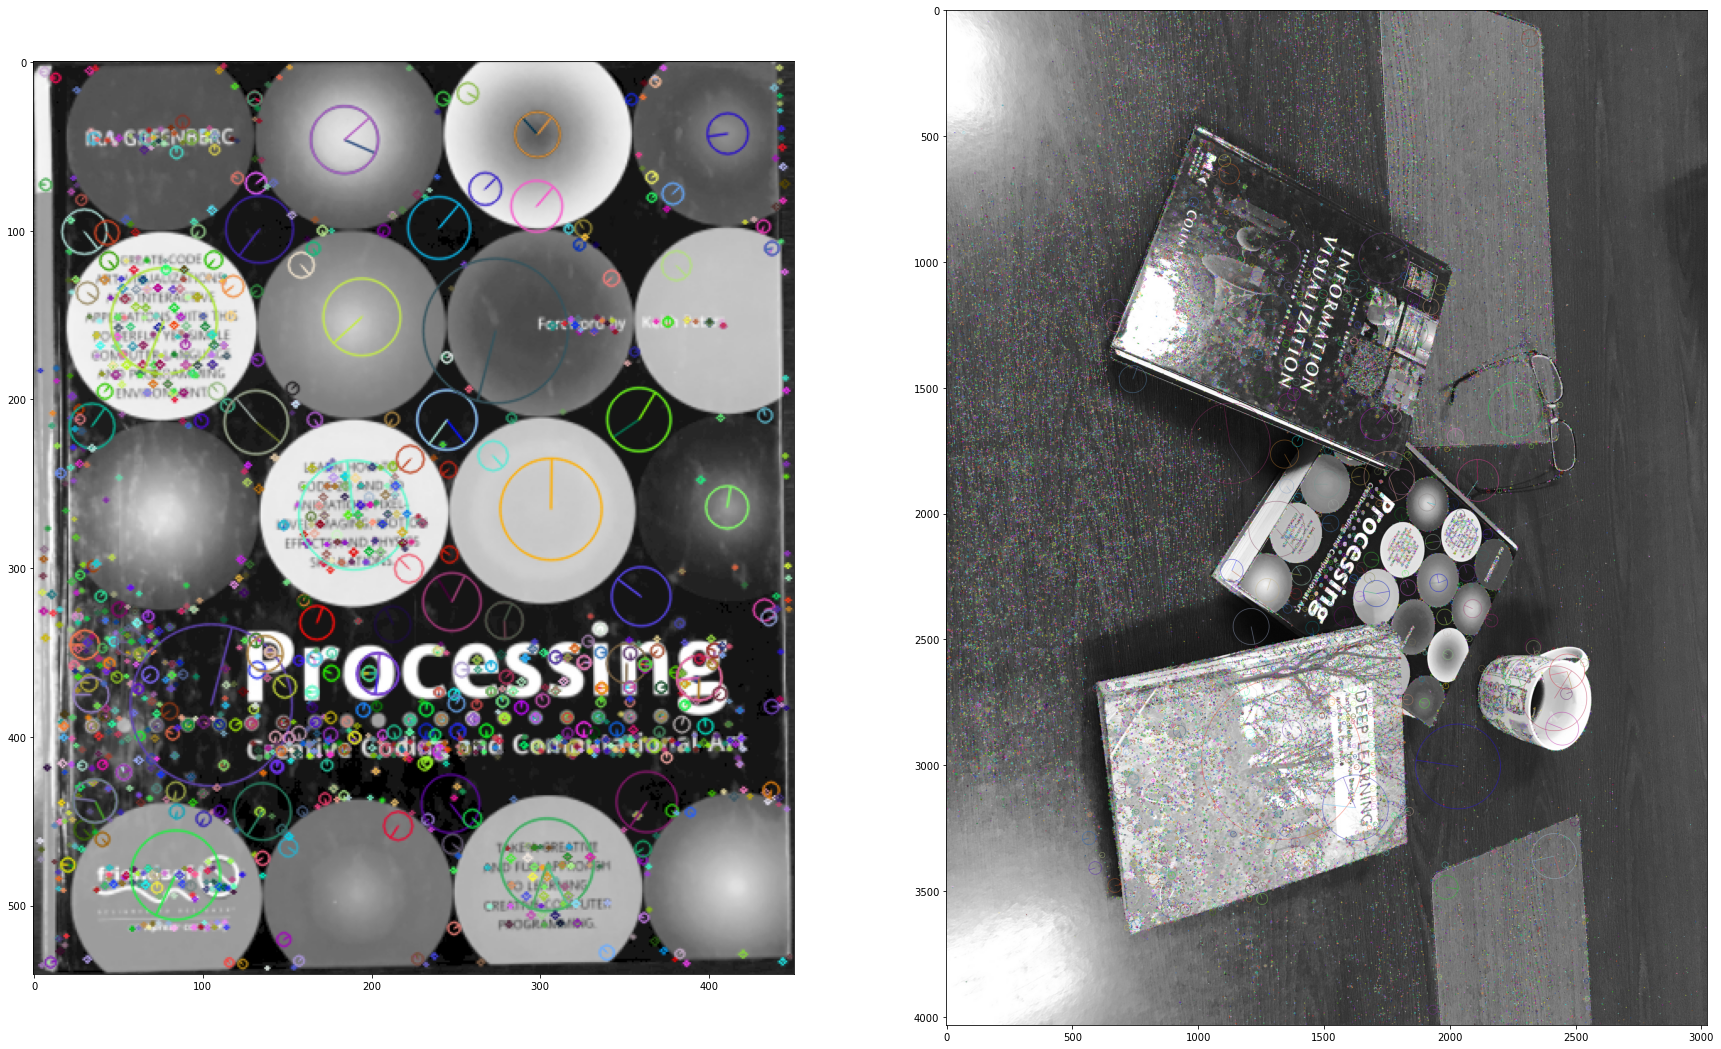

In [20]:
img1v=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,20))
plt.subplot(1,2,1), plt.imshow(img1v)
plt.subplot(1,2,2), plt.imshow(img2v)
plt.show()

In [21]:
cv2.imwrite('out.png',img1v)

True

In [22]:
# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.knnMatch(des1,des2, k=2)
# Sort them in the order of their distance.
good = []

In [23]:
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [24]:
print(good)

[[<DMatch 000001A04C76E810>], [<DMatch 000001A04C76E950>], [<DMatch 000001A04C76E990>], [<DMatch 000001A04C76EC90>], [<DMatch 000001A04C76ECD0>], [<DMatch 000001A04C76EDD0>], [<DMatch 000001A04C76F050>], [<DMatch 000001A04C76F210>], [<DMatch 000001A04C76F250>], [<DMatch 000001A04C76F4D0>], [<DMatch 000001A04C76FAD0>], [<DMatch 000001A04C76FD10>], [<DMatch 000001A04C770290>], [<DMatch 000001A04C770310>], [<DMatch 000001A04C7703D0>], [<DMatch 000001A04C7705D0>], [<DMatch 000001A04C770690>], [<DMatch 000001A04C7706D0>], [<DMatch 000001A04C771710>], [<DMatch 000001A04C771C10>], [<DMatch 000001A04C771FD0>], [<DMatch 000001A04C773290>], [<DMatch 000001A04C7737D0>], [<DMatch 000001A04C773810>], [<DMatch 000001A04C773850>], [<DMatch 000001A04C774310>], [<DMatch 000001A04C7744D0>], [<DMatch 000001A04C774C50>], [<DMatch 000001A04C774C90>], [<DMatch 000001A04C774CD0>], [<DMatch 000001A04C774E50>], [<DMatch 000001A04C774F90>], [<DMatch 000001A04C774FD0>], [<DMatch 000001A04C7765D0>], [<DMatch 0000

In [25]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

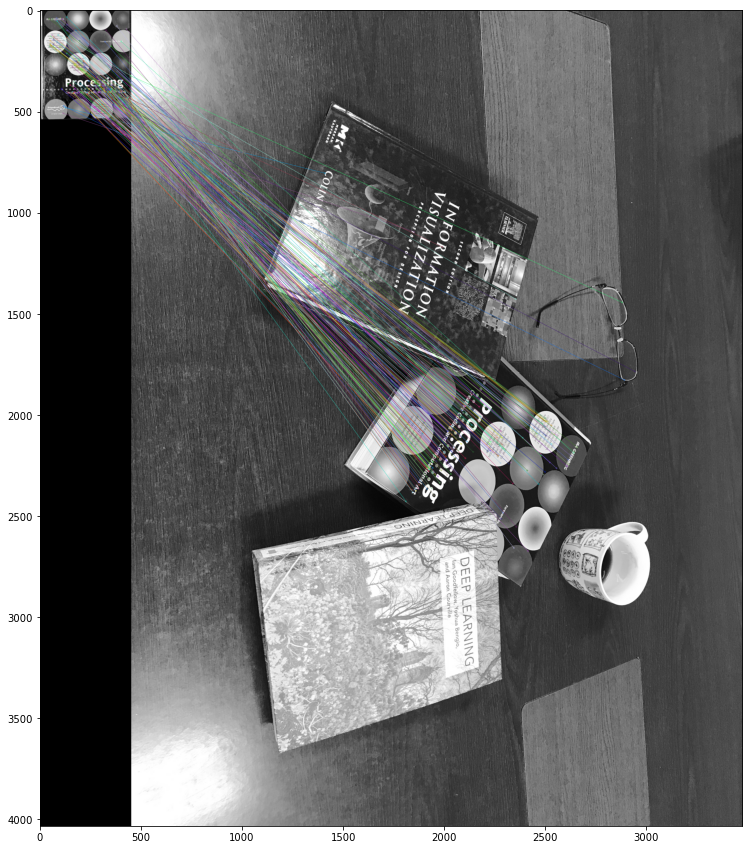

(<matplotlib.image.AxesImage at 0x1a04c7b6c70>, None)

In [26]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()